In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
# إعداد البيانات
time_steps = (224, 224)
batch_size = 32
num_classes = 1  # لأن المشكلة Binary

In [6]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

In [8]:
train_data = data_gen.flow_from_directory(
    'F:/PROJECT/Augmentation1',
    target_size=time_steps,
    batch_size=batch_size,
    class_mode='binary'
)

validation_data = data_gen.flow_from_directory(
    'F:/PROJECT/val',
    target_size=time_steps,
    batch_size=batch_size,
    class_mode='binary'
)

Found 5427 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [10]:
# MobileNetV2 كنموذج أساسي
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # نبدأ بالتجميد

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
# بناء الموديل
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(num_classes, activation='sigmoid')  # للـ binary classification
])

In [14]:
# تجميع الموديل
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
# إعداد الكولباكس
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [18]:
# تدريب المرحلة الأولى
epochs = 30
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs,
    steps_per_epoch=train_data.samples // batch_size,
    validation_steps=validation_data.samples // batch_size,
    callbacks=[early_stop, reduce_lr]
)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8921 - loss: 0.2298

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8923 - loss: 0.2294 - val_accuracy: 0.8750 - val_loss: 0.3264 - learning_rate: 0.0010
Epoch 2/30
  1/169 ━━━━━━━━━━━━━━━━━━━━ 1:12 431ms/step - accuracy: 1.0000 - loss: 0.0766

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0766 - val_accuracy: 1.0000 - val_loss: 0.1242 - learning_rate: 0.0010
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9626 - loss: 0.1107 - val_accuracy: 0.8750 - val_loss: 0.1945 - learning_rate: 0.0010
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9375 - loss: 0.1127 - val_accuracy: 1.0000 - val_loss: 0.0732 - learning_rate: 0.0010
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9602 - loss: 0.1068 - val_accuracy: 1.0000 - val_loss: 0.0937 - learning_rate: 0.0010
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9375 - loss: 0.1304 - val_accuracy: 0.8125 - val_loss: 0.3225 - learning_rate: 0.0010
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.9633 - loss: 0.0957 - val_accuracy: 0.8125 - val_loss: 0.5391 - learning_rate: 0.0010
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.1410 - val_accu

In [20]:
train_loss, train_accuracy = model.evaluate(train_data)
print(f"Initial Training Accuracy: {train_accuracy * 100:.2f}%")

170/170 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.9735 - loss: 0.0740
Initial Training Accuracy: 97.18%


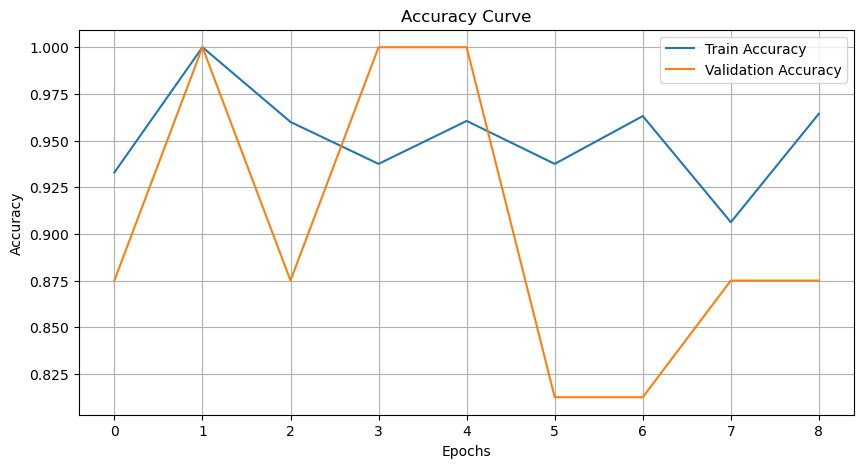

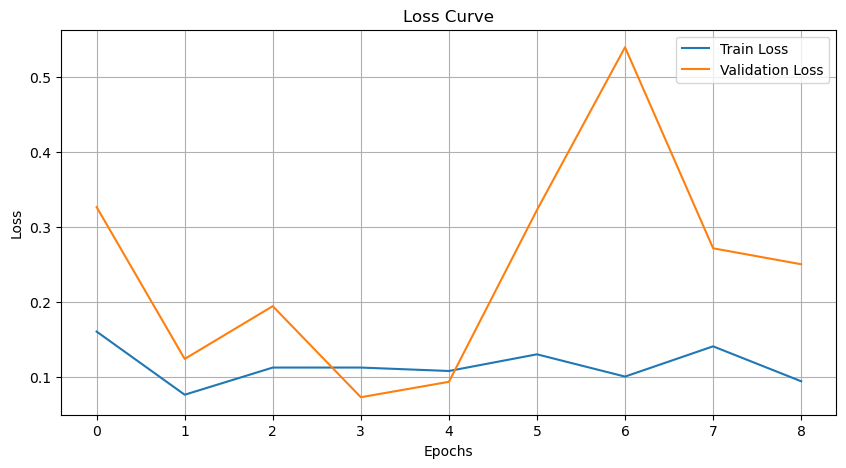

In [22]:
import matplotlib.pyplot as plt

# رسم دقة التدريب والتحقق
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# رسم الـ Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()